# PHASE 1 MILESTONE 1

# I. INTRODUCTION

Hello everyone! Welcome to my notebook.

In this notebook I will be doing an analysis for my assignment. As the author of this notebook, here is short profile :

* Name : Alexander Prasetyo Christianto
* Age : 23
* Last Education Background : Electrical Engineering
* Occupation : Full Time Data Science Student Batch-001

## About The Data

The data used in this task was taken from Machine Learning Datasets in BigQuery Google Public Dataset. The data is retrieved by querying the `credit_card_default` table.

The columns that I am going to use are `limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default`.

Here is the dataset link: [Dataset Link](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table)

And now I will provide the data dictionary :

- limit_balance : Amount of given credit in NT dollars (includes individual and family/supplementary credit
- sex: Gender (1=male, 2=female)
- education_level: Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- marital_status : Marital status (1=married, 2=single, 3=others)
- age: Age in years
- pay_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2: Repayment status in August, 2005 (scale same as above)
- pay_3: Repayment status in July, 2005 (scale same as above)
- pay_4: Repayment status in June, 2005 (scale same as above)
- pay_5: Repayment status in May, 2005 (scale same as above)
- pay_6: Repayment status in April, 2005 (scale same as above)
- bill_amt_1: Amount of bill statement in September, 2005 (NT dollar)
- bill_amt_2: Amount of bill statement in August, 2005 (NT dollar)
- bill_amt_3: Amount of bill statement in July, 2005 (NT dollar)
- bill_amt_4: Amount of bill statement in June, 2005 (NT dollar)
- bill_amt_5: Amount of bill statement in May, 2005 (NT dollar)
- bill_amt_6: Amount of bill statement in April, 2005 (NT dollar)
- pay_amt_1: Amount of previous payment in September, 2005 (NT dollar)
- pay_amt_2: Amount of previous payment in August, 2005 (NT dollar)
- pay_amt_3: Amount of previous payment in July, 2005 (NT dollar)
- pay_amt_4: Amount of previous payment in June, 2005 (NT dollar)
- pay_amt_5: Amount of previous payment in May, 2005 (NT dollar)
- pay_amt_6: Amount of previous payment in April, 2005 (NT dollar)
- default_payment_next_month: Default payment (1=yes, 0=no)

Regarding the data used, I will provide an explanation of the data.

**What it means to default on a credit card (From a Credit Card User point of View)?**<br>
<br>In case you’re unclear on what defaulting on a credit card means, here’s the gist: After you’ve failed to make a payment on your credit card for 180 days (or as decided by your credit card company), your issuer assumes you’re probably never going to. At this point, the issuer can (and usually does) close your card, write off what you owe as bad debt and sell your account to a collections agency.

Now your credit card issuer is out of the picture. Your debt belongs to a collector, and you’ll start getting flooded with phone calls asking you to pay the bill. Although you can send written notice asking them to stop calling you and there are laws limiting what debt collectors can say and do when they contact you, you’ll still owe the debt. And if you don’t deal with it one way or another, you could get sued.

In short, defaulting on a credit card bill has serious consequences. You should make it a priority to handle this matter as soon as you can.

**What does it mean from a Bank’s Point of View?**<br>
<br>Well, it’s analogus to if someone asked to borrow some money from you, and never pays you back. You’re going to be 100 bucks short and the other person 100 bucks happier (I really need to work on my analogies).

A bad loan for the bank can therefore lead to a huge financial loss in the event of a defaulter and thus requires heavy risk-mitigation regarding this issue. Furthermore, the bank loaning process can be quite a manual and tiresome task in identifying who might be a potential defaulter. The loaning process is also quite ependent on the loan processors themselves, leaving a lot of it to subjectivity which might possibly turn into a bad loan in the future.

But then again, on the flipside, banks can also earn a lot from people who actually pay back their loans. Additionally, we don’t want to be turning people away who could really use that money to get their lives back on track or achieve their dreams (i.e. setting up a business they’ve always wanted to).



## Objectives

A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

# II. IMPORT LIBRARIES

This section contains all the libraries that I am going to use throughout this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import LabelEncoder
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# III. DATA LOADING

The data was obtained from BigQuery Google Public Data, therefore I used MySQL to get the data. Here is the query that I used.

~~~~sql
SELECT 
  limit_balance, 
  sex, 
  education_level, 
  marital_status, 
  age, 
  pay_0, 
  pay_2, 
  pay_3, 
  pay_4, 
  pay_5, 
  pay_6, 
  bill_amt_1, 
  bill_amt_2, 
  bill_amt_3, 
  bill_amt_4, 
  bill_amt_5, 
  bill_amt_6, 
  pay_amt_1, 
  pay_amt_2, 
  pay_amt_3, 
  pay_amt_4, 
  pay_amt_5, 
  pay_amt_6, 
  default_payment_next_month 
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 31984
~~~~

And now I load the data into a variable named `df`.

In [2]:
df = pd.read_csv('h8dsft_P1M1_Alexander_Prasetyo.csv')

Here is the preview of the data for this project.

In [3]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [4]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


# IV. DATA CLEANING

This section is for cleaning and manipulating some part of the data for better understanding and analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

This dataset contains 2964 observations of 24 variables from a bank (and also a cash and credit card issuer in Taiwan); where each observation corresponds to a particular credit card client.

Now, it's time to check the missing values in the dataset.

In [6]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

While all is fine and dandy in the no-null neighborhood, things aren’t going so smoothly in other areas.

In [7]:
df.duplicated().sum()

1

And turns out there is a duplicated entry in dataset. I will handle the duplicated entry later in this section.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


We see from a simple dataset description that three things stand out: `education_level` and `marital_status` also `pay_1` ~ `pay_6`. Here is the proof:

In [9]:
e_m = ['education_level', 'marital_status', 'pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

for col in e_m:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable education_level
2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

Frequency of Categories for variable marital_status
2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

Frequency of Categories for variable pay_0
 0    1516
-1     540
 1     356
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_0, dtype: int64

Frequency of Categories for variable pay_2
 0    1607
-1     580
 2     374
-2     353
 3      32
 4       8
 1       4
 7       3
 5       2
 6       2
Name: pay_2, dtype: int64

Frequency of Categories for variable pay_3
 0    1610
-1     580
 2     368
-2     367
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64

Frequency of Categories for variable pay_4
 0    1667
-1     532
-2     408
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype

In both columns, the values do not match the data dictionary. Therefore, I will manipulate values that are not in accordance with the data dictionary to make it more precise and facilitate analysis in this project. I will also rename 2 columns name for better understanding.

Then in `pay_1` to `pay_6` there are values of -2 and 0. According to the data dictionary, there should be no -2. Also, by my logic, if value of 1 to 9 represent the lateness of someone paying their credit card debt, then why there is a value of 0? That should be the same as pay in duly. Therefore, I will change -2 and 0 value to 0 whereas 0 represents paid in duly.

## 4.1 COLUMNS MANIPULATION

**Manipulating `education_level`**

<AxesSubplot:xlabel='education_level', ylabel='count'>

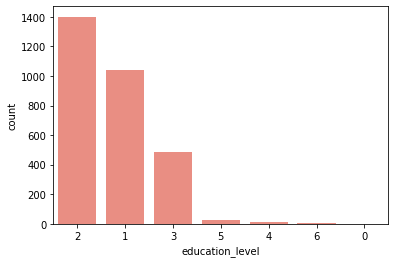

In [10]:
fig, ax = plt.subplots()
sns.countplot(data=df,x='education_level', order = df['education_level'].value_counts().index, color='salmon')

As it can be seen from the graph above, there are values of 5 and 6. According to the data dictionary, it categorize as unknown. If the data dictionary says it is unknown then why is it even specified into two different categories? So to tidy things up, I will change the value of 5 and 6 into 4.

In [11]:
df['education_level'] = df['education_level'].apply(lambda edu_value: edu_value 
                                        if ((edu_value > 0 and edu_value < 4)) 
                                        else 4) # Changes every value of x not within (and inclusive of) 1 ~ 3 to 4  

# Corrected changes
df['education_level'].unique()

array([1, 2, 3, 4], dtype=int64)

**Manipulating `marital_status`**

<AxesSubplot:xlabel='marital_status', ylabel='count'>

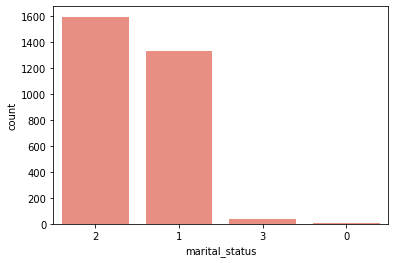

In [12]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='marital_status', order = df['marital_status'].value_counts().index, color='salmon')

From the graph above, it can be seen that there is a value of 0 in `marital_status`. This also doesn't inline with the data dictionary, so I will also change 0 value to 3.

In [13]:
df['marital_status'] = df['marital_status'].apply(lambda marriage_value: marriage_value
                                     if (marriage_value > 0 and marriage_value < 3)
                                     else 3) # changes every value of x not within (and inclusive of) 1 and 2 to 3

# Corrected changes
df['marital_status'].unique()

array([2, 1, 3], dtype=int64)

**Manipulating `pay_1` ~ `pay_6`**

In [14]:
df.loc[:, 'pay_0'] = df.loc[:, 'pay_0'].replace(-2,0)
df.loc[:, 'pay_0'] = df.loc[:, 'pay_0'].replace(-1,0)
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-2,0)
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-1,0)
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-2,0)
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-1,0)
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-2,0)
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-1,0)
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-2,0)
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-1,0)
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-2,0)
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-1,0)

**Renaming columns**

I will rename 2 columns name in purpose of easier analysis and more user-friendly terms. The columns name that I will change are `pay_0` and `default_payment_next_month`.

In [15]:
# Renaming Columns into more understandable/user-friendly terms
# PAY_0 changed to PAY_1
# default.payment.next.month is too long and changed to something simplier, default

df.rename(columns={'pay_0':'pay_1',
                   'default_payment_next_month':'DEFAULT',} , inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limit_balance    2965 non-null   int64
 1   sex              2965 non-null   int64
 2   education_level  2965 non-null   int64
 3   marital_status   2965 non-null   int64
 4   age              2965 non-null   int64
 5   pay_1            2965 non-null   int64
 6   pay_2            2965 non-null   int64
 7   pay_3            2965 non-null   int64
 8   pay_4            2965 non-null   int64
 9   pay_5            2965 non-null   int64
 10  pay_6            2965 non-null   int64
 11  bill_amt_1       2965 non-null   int64
 12  bill_amt_2       2965 non-null   int64
 13  bill_amt_3       2965 non-null   int64
 14  bill_amt_4       2965 non-null   int64
 15  bill_amt_5       2965 non-null   int64
 16  bill_amt_6       2965 non-null   int64
 17  pay_amt_1        2965 non-null   int64
 18  pay_amt_

**Dropping Duplicates**

I will also remove the duplicate entries in this dataset.

In [16]:
duplicateRows = df[df.duplicated()]
duplicateRows

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,DEFAULT
2245,200000,2,1,1,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.drop_duplicates(inplace=True)

And now I will **reset the index of my data**.

In [18]:
df.reset_index(drop=True)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,DEFAULT
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,210000,2,2,1,39,0,0,0,0,0,...,0,0,12000,0,28428,0,0,12000,33664,0
2960,280000,2,1,1,41,2,0,0,0,0,...,0,0,244,6859,486,0,0,244,0,0
2961,80000,1,1,2,28,1,0,0,0,0,...,0,0,0,47,207,0,0,0,0,0
2962,200000,1,2,1,53,1,0,0,0,0,...,0,0,6753,2920,0,0,0,6753,0,1


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.841768,0.739144,1.0,1.00,2.0,2.00,4.0
marital_status,2964.0,1.564103,0.521822,1.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_1,2964.0,0.353576,0.775392,0.0,0.00,0.0,0.00,8.0
pay_2,2964.0,0.311404,0.800265,0.0,0.00,0.0,0.00,7.0
pay_3,2964.0,0.301619,0.799585,0.0,0.00,0.0,0.00,7.0
pay_4,2964.0,0.269568,0.787520,0.0,0.00,0.0,0.00,8.0
pay_5,2964.0,0.242240,0.755243,0.0,0.00,0.0,0.00,7.0


After calling describe function to my data variable, all the changes that I made have been completed.

Here is a quick recap of pre-processing manipulations I did.

1. `default.payment.next.month` to DEFAULT
2. `PAY_0` to `PAY_1`
3. Grouped unknown `education_level` categories (0,5,6) and re-assigned them to 4 (others)
4. Grouped unknown `marital_status` categories (0) and re-assigned them to 3 (others)
5. Changing negative values in `pay_1` ~ `pay_6` to 0

# V. EXPLORATORY DATA ANALYSIS (EDA)

Alright, it is worth to remember that my target for this project is to predict whether a credit card holder will be default or not.

In this section, I will go through the data to gain any insights I may obtain.

## 5.1 Target Visualization

First, I want to know the visualization of the target.

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


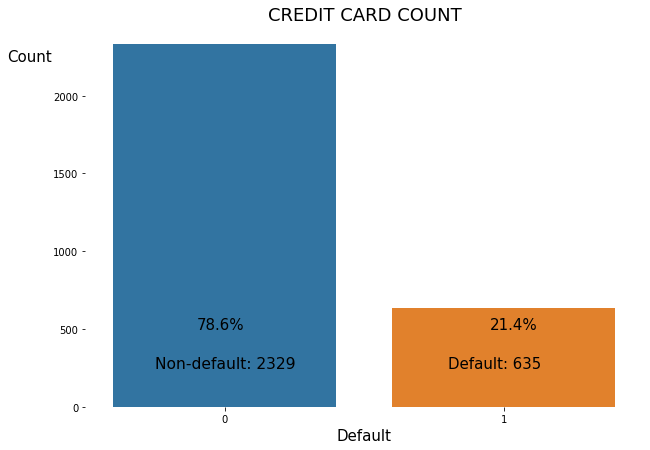

In [20]:
default = df['DEFAULT'].sum()
no_default = len(df['DEFAULT']) - default

default_perc = round(default/len(df['DEFAULT']) * 100, 1)
no_default_perc = round(no_default/len(df['DEFAULT']) * 100, 1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_context('notebook', font_scale=1.2)

sns.countplot('DEFAULT', data = df)
plt.annotate(f'Non-default: {no_default}', 
             xy=(-0.25, 250),
            size=15.5)

plt.annotate('Default: {}'.format(default), 
             xy=(0.8, 250),
            size=15)

plt.annotate('{}%'.format(no_default_perc), xy=(-0.1, 500),size=15)
plt.annotate('{}%'.format(default_perc), xy=(0.95, 500),size=15)
plt.title('CREDIT CARD COUNT', size=18)
plt.xlabel("Default",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40,
           size=15)
ax.yaxis.set_label_coords(-0.1,.9)
plt.box(False)

The graph above tells us that it turns out there is a **class imbalance in the target variable**.

## 5.2 Frequency of Explanatory Variables by Defaulted / Non-Defaulted Cards

### 5.2.1 Categorical Explanatory Variables

For context, I will write down the revised data dictionary again for the categorical variables.

- `limit_balance` : Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit.
- `sex` : Gender of a person ( 1 = male, 2 = female)
- `education_level` : Level education of a person ( 1 = graduate school, 2 = university, 3 = high school, 4 = others )
- `marital_status`: Marital status of a person ( 1 = married, 2 = single; 3 = others )
- `pay_1 ~ pay_6` : History of a person's past payment.
    - pay_1: Repayment status in September, 2005 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    - pay_2: Repayment status in August, 2005 (scale same as above)
    - pay_3: Repayment status in July, 2005 (scale same as above)
    - pay_4: Repayment status in June, 2005 (scale same as above)
    - pay_5: Repayment status in May, 2005 (scale same as above)
    - pay_6: Repayment status in April, 2005 (scale same as above)

Alright, now I will create a new dataframe just for the categorical variables.

In [21]:
# Creating a new dataframe with just the categorical explanatory variables

df_categorical = df[['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'DEFAULT']]

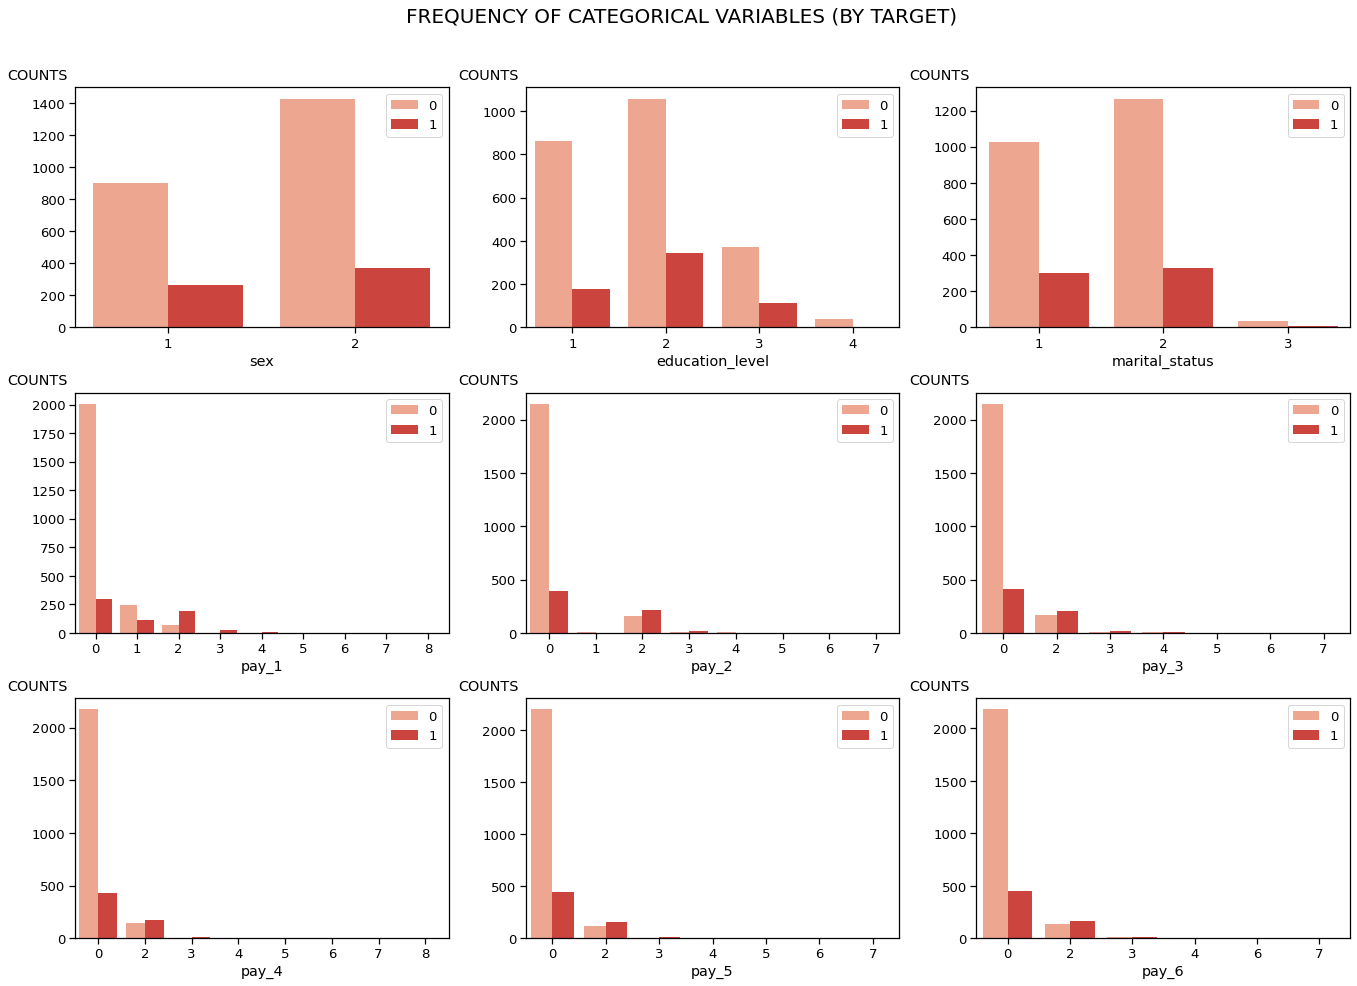

In [22]:
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)",size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.countplot(x='sex', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='education_level', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='marital_status', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='pay_1', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='pay_2', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='pay_3', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[1,2])
ax7 = sns.countplot(x='pay_4', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,0])
ax8 = sns.countplot(x='pay_5', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,1])
ax9 = sns.countplot(x='pay_6', hue = 'DEFAULT', data=df_categorical, palette='Reds', ax=axes[2,2])

# Setting legends to upper right
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")
ax6.legend(loc="upper right")
ax7.legend(loc="upper right")
ax8.legend(loc="upper right")
ax9.legend(loc="upper right")

# Changing ylabels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

Here is my observartion based on the graphs that I have visualize:

- NonDefaults have a higher proportion of Females (Sex=2)
- NonDefaults have a higher proportion of more education (EDUCATION=1 or 2)
- NonDefaults have a higher proportion of Singles (MARRIAGE=1)
- NonDefaults have a MUCH higher proportion of zero PAY_X variables (this means that being duly of payments is associated with not defaulting in the following month).

### 5.2.2 Numerical Explanatory Variables

And now I will visualize counts of default and non-default grouped by age of a person

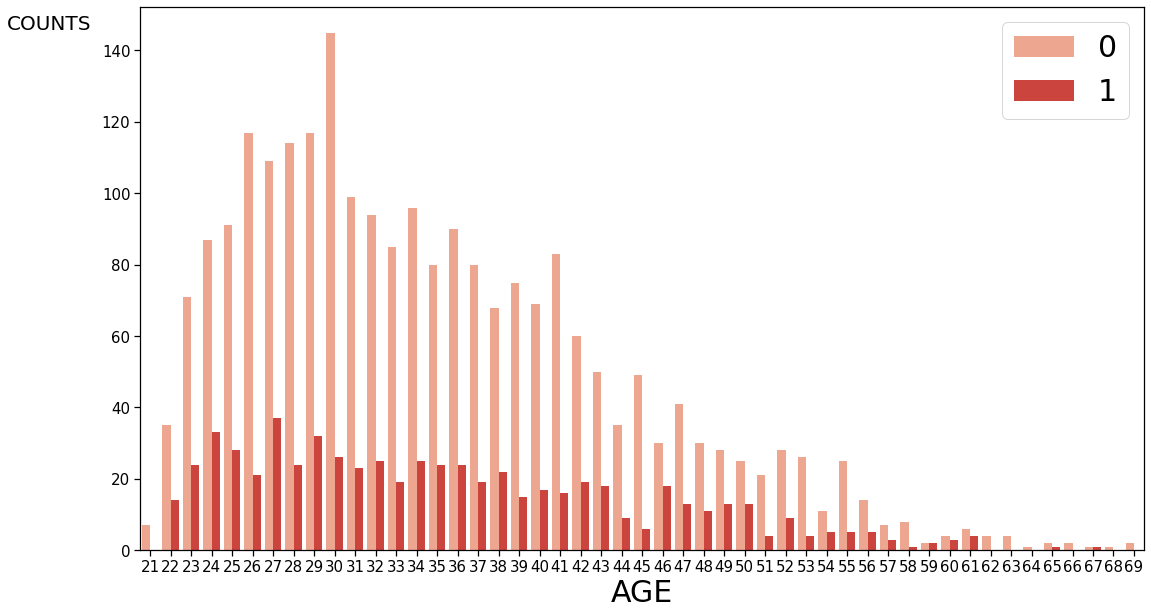

In [23]:
# By Age
fig, axz = plt.subplots(figsize=(18,10))

axz = sns.countplot(x='age', hue='DEFAULT', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('AGE', size=30)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

By the graph above, the information that I can interpret is **NonDefaults have a higher proportion of people 26-36 years**.

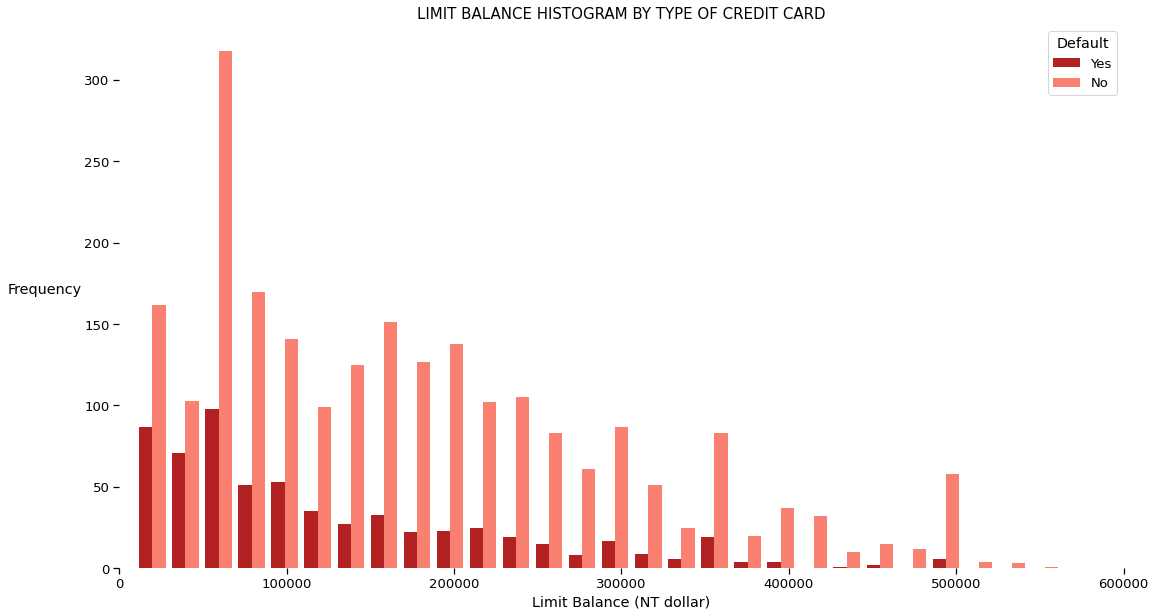

In [24]:
x1 = list(df[df['DEFAULT'] == 1]['limit_balance'])
x2 = list(df[df['DEFAULT'] == 0]['limit_balance'])

fig2, ax_lim_bal = plt.subplots(figsize=(18,10))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['firebrick', 'salmon'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency', rotation=0,labelpad=40)
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)
plt.box(False)

I have seggregated the `limit_balance` by `DEFAULT` type. My observation is that it tells me that lower limit balance may has higher chance to be Default compared to the higher limit balance credit card.

In [25]:
df_bill = df[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']]

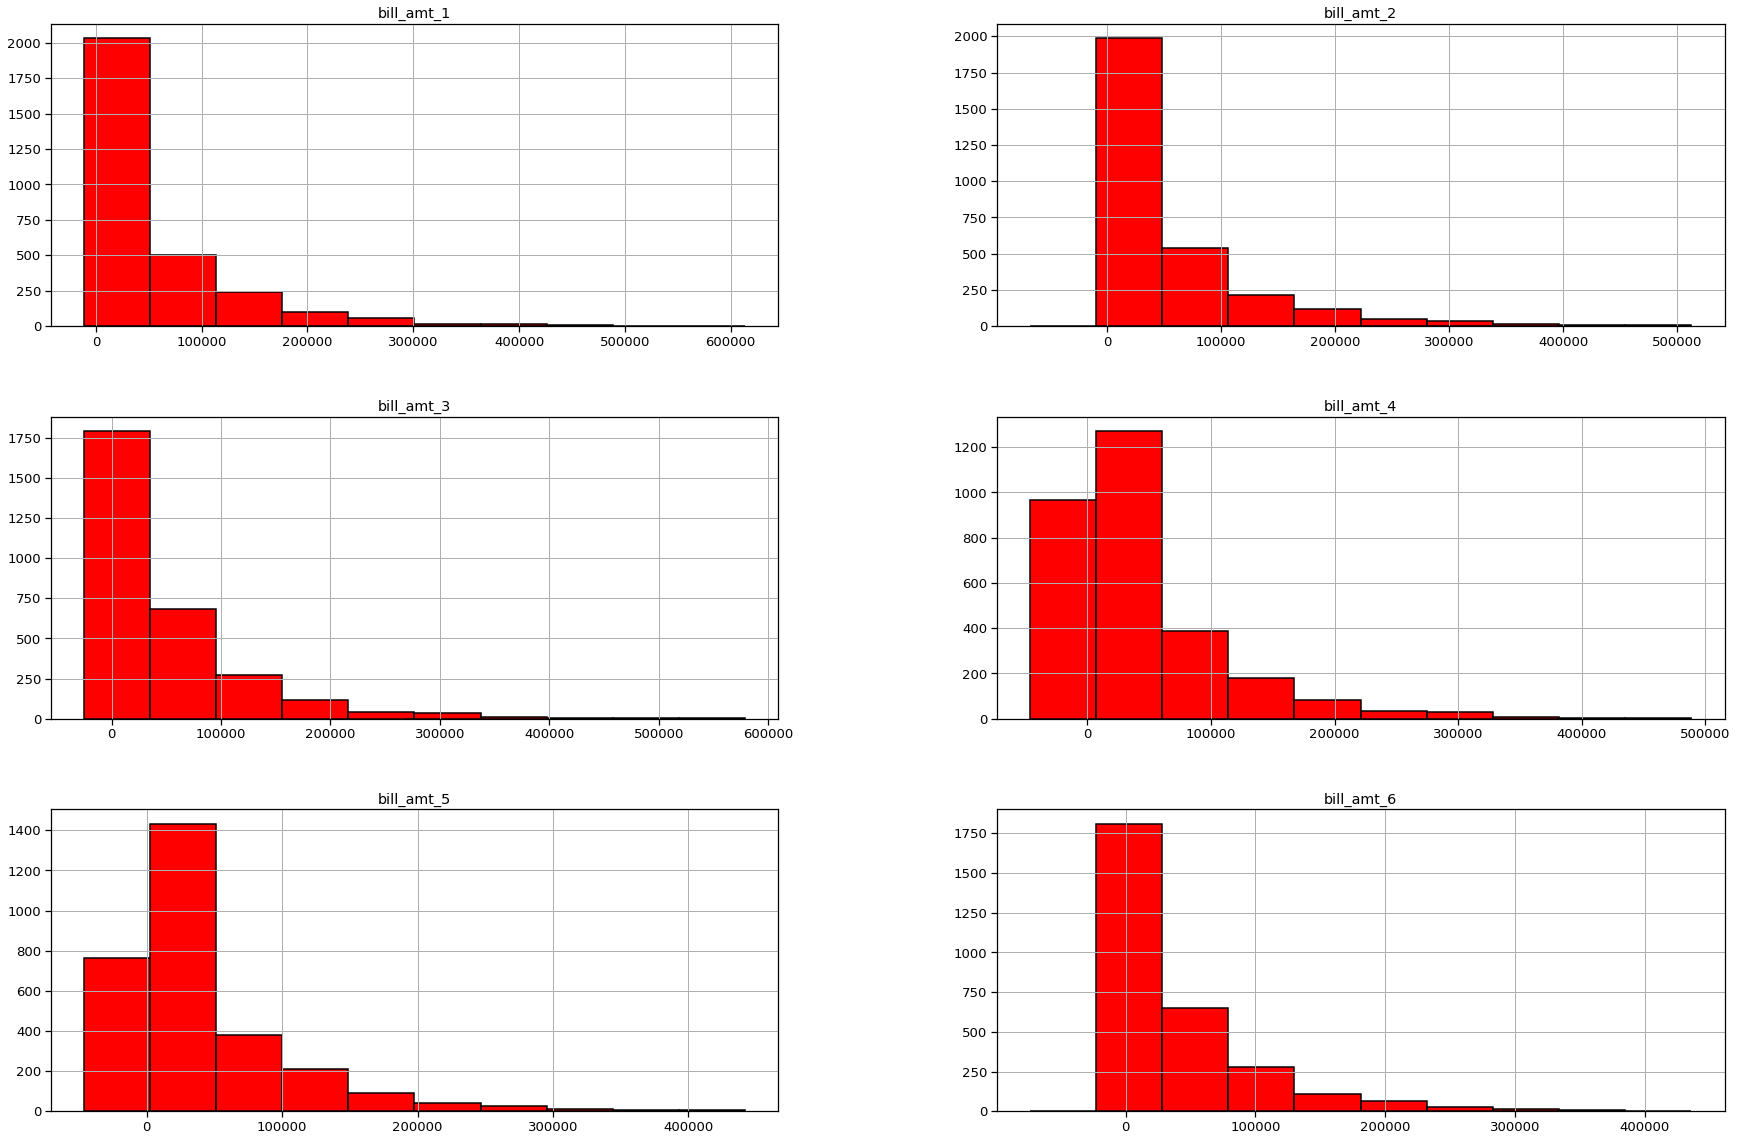

In [26]:
distribution = df_bill.hist(edgecolor = 'black', linewidth = 1.5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(30,20)
plt.show()

In [27]:
df_pay_amt = df[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']]

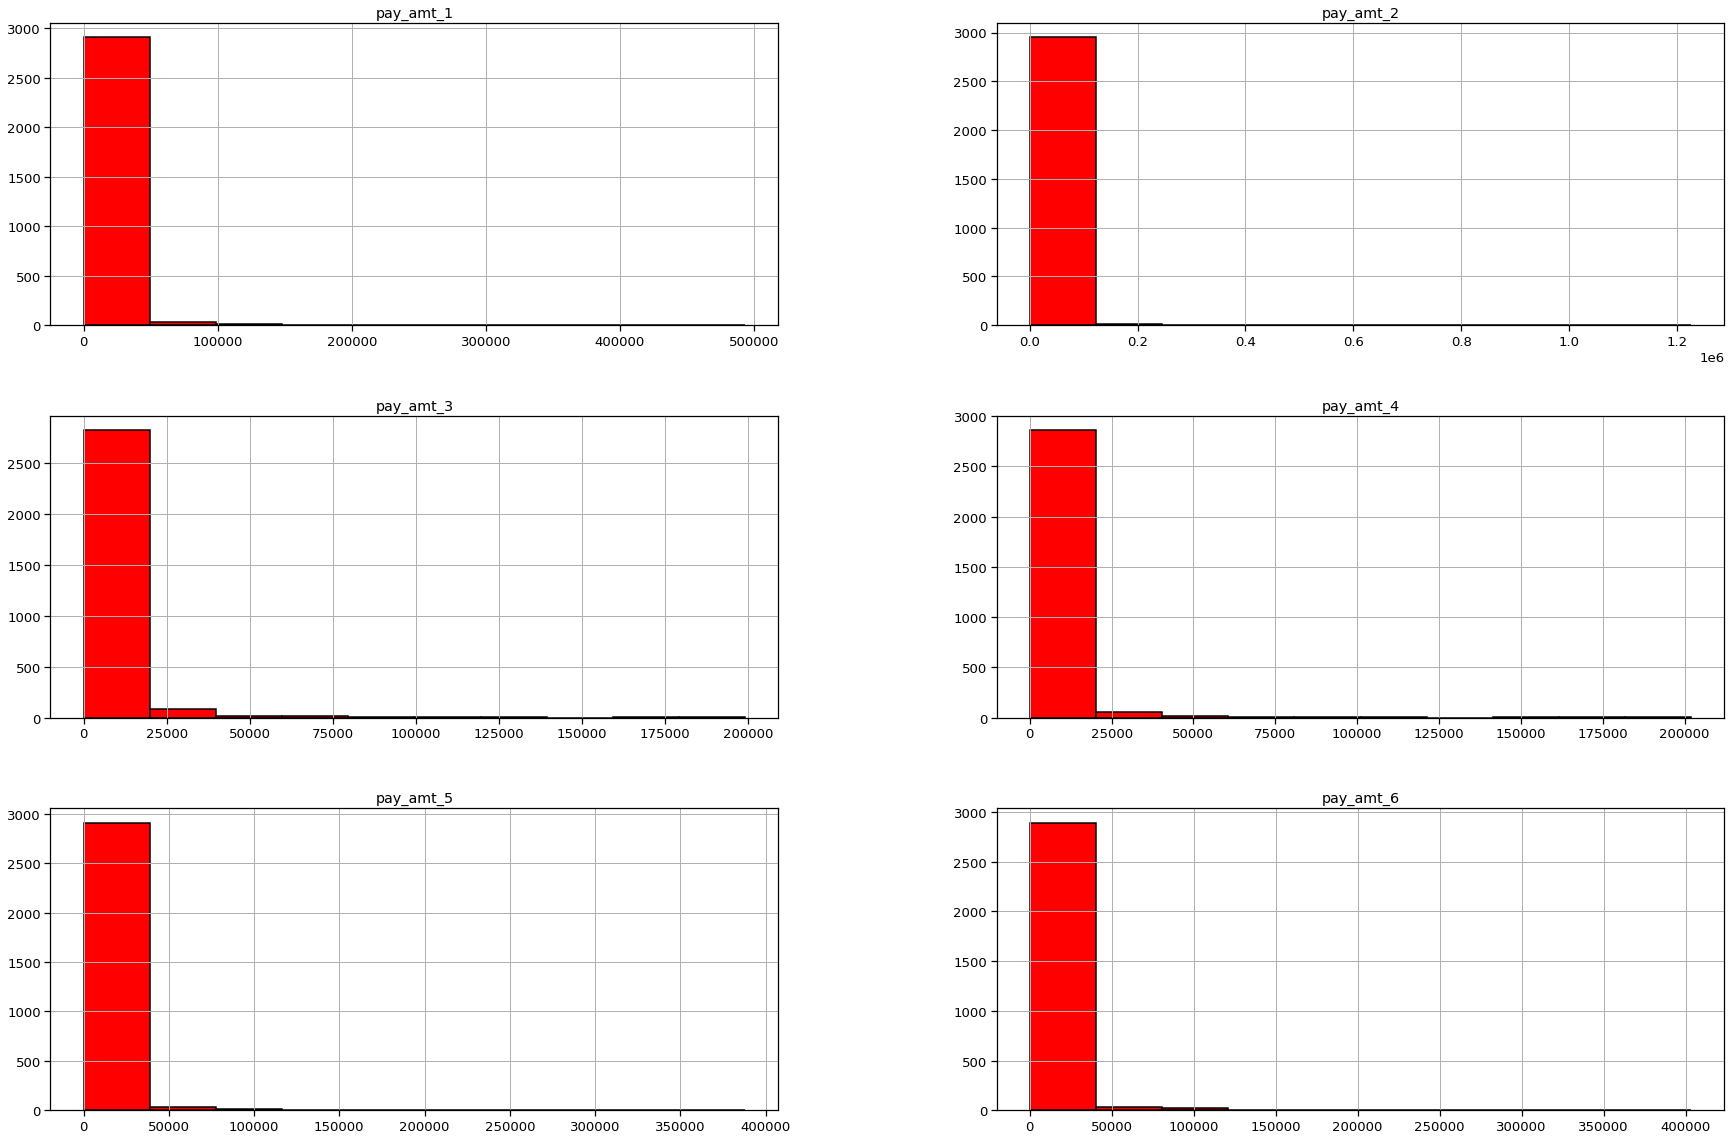

In [28]:
distribution = df_pay_amt.hist(edgecolor = 'black', linewidth = 1.5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(30,20)
plt.show()

The multiple graph above just shows me the unique value count from each variable. After upon a closer look there is nothing that can be inferred more from here.

# VI. DATA PREPROCESSING

In this section, I will perform a few things such as feature selection,

## 6.1 FEATURE SELECTION

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'DEFAULT']


<AxesSubplot:>

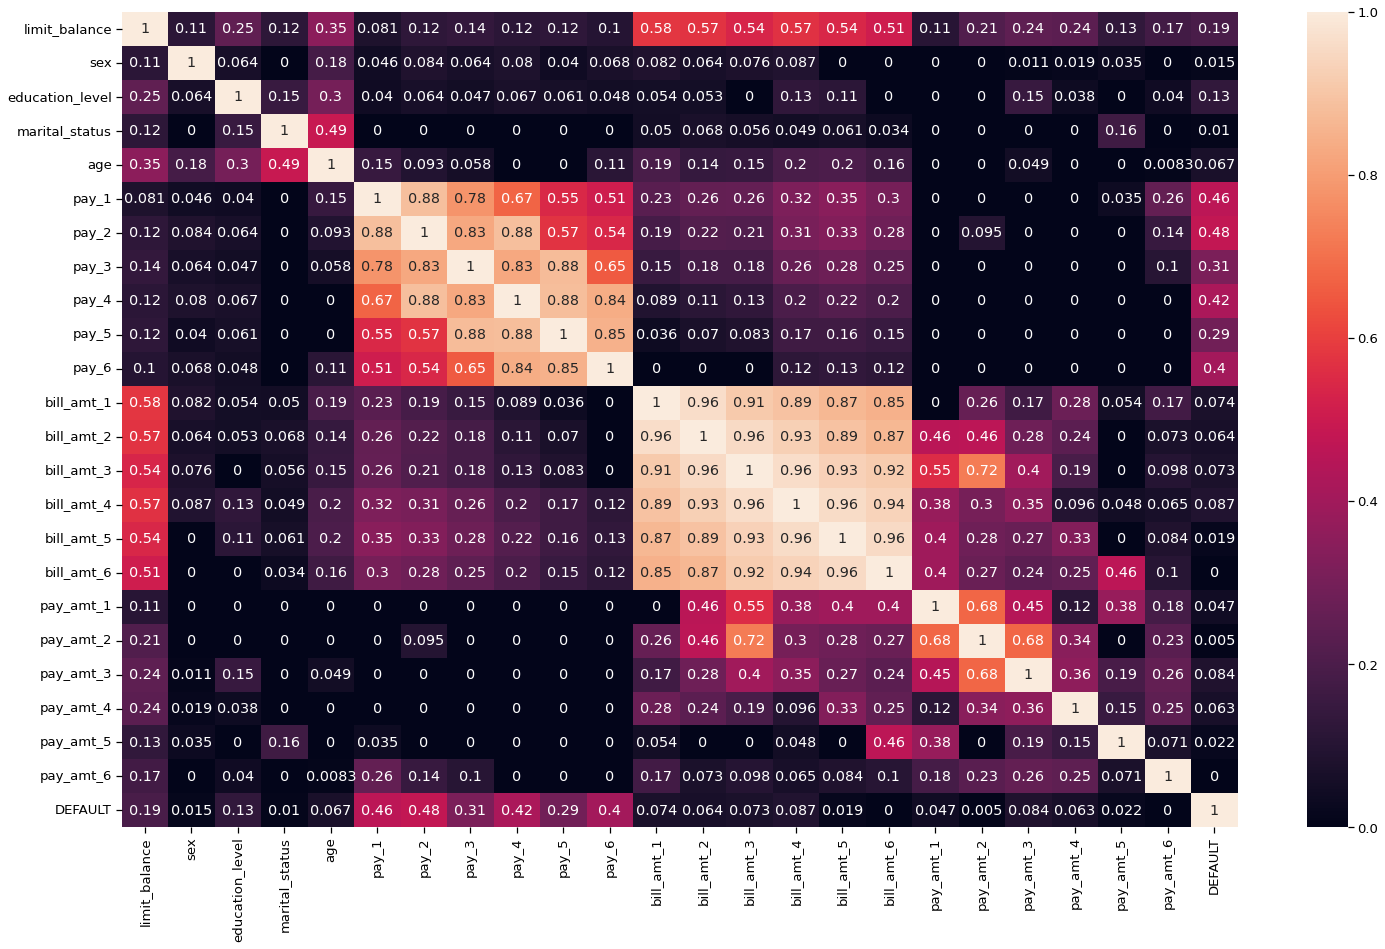

In [29]:
# Setting figure size
fig = plt.figure(figsize = (25, 15))
# Sets heatmap plot
sns.heatmap(df.phik_matrix(),
            vmin = 0,
            vmax = 1,
            annot = True)

From the heatmap above, it tells me that `pay_1` ~ `pay_6` and `limit_balance` are the features that highest correlation to `DEFAULT`. Thus, I will be using these features for my models. I will also use `age` because, by my personal judgment, the age of the people is likely to be a factor in whether or not a credit card will be defaulted. Supposedly, people aged 30 and over have a better level of financial management than people aged 30 and under. And then I will also use `marriage` and `sex` because those the marital status of a person may influence their credit card use. And as for `sex` is just purely based on curiosity. In my opinion, usually females have better money or budget management, so females are more likely NonDefaulted. Lastly, by the visualization that I have shown in the previous section, people who has higher `education_level` is more likely to be NonDefault, thus I am considering this as one of my features.

Now, I will change some feature dtypes because these features is actually categorical even though the entries contained in those features are numerical.

In [30]:
df['sex'] = df['sex'].apply(str)
df['education_level'] = df['education_level'].apply(str)
df['marital_status'] = df['marital_status'].apply(str)
df['pay_1'] = df['pay_1'].apply(str)
df['pay_2'] = df['pay_2'].apply(str)
df['pay_3'] = df['pay_3'].apply(str)
df['pay_4'] = df['pay_4'].apply(str)
df['pay_5'] = df['pay_5'].apply(str)
df['pay_6'] = df['pay_6'].apply(str)

## 6.2 INFERENCE MODEL

I will take a few entries of the data to be my inference model. This is done in purpose of to test out my models that will be created later.

In [31]:
data_inf = df.sample(5, random_state=1)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,DEFAULT
1765,120000,2,2,2,43,2,2,0,0,0,...,47951,41563,36779,0,3507,2000,2500,2000,1500,1
525,270000,2,2,1,27,0,0,0,2,0,...,14852,18669,25175,4000,5000,0,10000,7000,2000,0
1456,60000,2,2,1,40,0,0,0,0,0,...,4790,6388,5816,5000,1508,4790,6388,6046,17806,0
929,310000,2,1,1,45,0,0,0,0,0,...,97722,101082,103202,3340,4370,4000,5000,3899,3761,0
854,340000,2,2,2,32,0,0,0,0,0,...,85282,87070,88828,3871,3136,3014,3123,3168,4855,0


In [32]:
data_train_test = df.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,DEFAULT
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,0,0,0,0,0,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,0,0,0,0,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,0,0,0,0,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,0,0,0,0,...,0,0,6753,2920,0,0,0,6753,0,1


In [33]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## 6.3 SPLITTING THE DATA

In [34]:
X = data_train_test.drop(columns='DEFAULT', axis=1)
y = data_train_test['DEFAULT']
X

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,...,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,...,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,...,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,...,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,210000,2,2,1,39,0,0,0,0,0,...,28428,0,0,12000,0,28428,0,0,12000,33664
2955,280000,2,1,1,41,2,0,0,0,0,...,486,0,0,244,6859,486,0,0,244,0
2956,80000,1,1,2,28,1,0,0,0,0,...,207,0,0,0,47,207,0,0,0,0
2957,200000,1,2,1,53,1,0,0,0,0,...,0,0,0,6753,2920,0,0,0,6753,0


In [35]:
train, test = train_test_split(data_train_test, test_size=0.2, stratify=y, random_state=39)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (2367, 24)
Test size:  (592, 24)


In [36]:
train = train.filter(['limit_balance','sex','age','education_level','marital_status',
                'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','DEFAULT'], axis=1)
test = test.filter(['limit_balance','sex','age','education_level','marital_status',
                'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','DEFAULT'], axis=1)
train

,limit_balance,sex,age,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,DEFAULT
1717,50000,2,47,3,1,1,2,0,0,0,0,1
661,110000,2,51,1,1,0,0,0,0,0,0,0
174,500000,2,33,2,1,0,0,0,0,0,0,0
2493,140000,1,30,2,2,0,0,0,0,0,0,0
776,230000,2,27,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,180000,2,34,2,1,0,0,0,0,0,0,0
1383,90000,1,35,1,1,0,0,2,2,2,2,1
2804,230000,1,38,1,1,0,0,0,0,0,0,0
626,210000,2,51,3,2,2,0,0,0,0,2,1


In [37]:
X_train = train.drop(columns='DEFAULT')
y_train = train['DEFAULT']

X_test = test.drop(columns='DEFAULT')
y_test = test['DEFAULT']

### 6.3.1 SPLITTING THE NUMERICAL AND CATEGORICAL FEATURES

In [38]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Numerical Features:', num_columns)
print('Categorical Features:', cat_columns)

Numerical Features: ['limit_balance', 'age']
Categorical Features: ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [39]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## 6.4 SCALING THE NUMERICAL FEATURES

In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.05063291, 0.54166667],
       [0.12658228, 0.625     ],
       [0.62025316, 0.25      ],
       ...,
       [0.27848101, 0.35416667],
       [0.25316456, 0.625     ],
       [0.01265823, 0.08333333]])

## 6.5 CONCATENATING NUMERICAL AND CATEGORICAL FEATURES

In [41]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[0.05063291139240507, 0.5416666666666666, '2', ..., '0', '0', '0'],
       [0.12658227848101264, 0.625, '2', ..., '0', '0', '0'],
       [0.620253164556962, 0.25, '2', ..., '0', '0', '0'],
       ...,
       [0.27848101265822783, 0.35416666666666663, '1', ..., '0', '0',
        '0'],
       [0.2531645569620253, 0.625, '2', ..., '0', '0', '2'],
       [0.012658227848101266, 0.08333333333333326, '1', ..., '0', '0',
        '0']], dtype=object)

In [42]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.050633,0.541667,2,3,1,1,2,0,0,0,0
1,0.126582,0.625,2,1,1,0,0,0,0,0,0
2,0.620253,0.25,2,2,1,0,0,0,0,0,0
3,0.164557,0.1875,1,2,2,0,0,0,0,0,0
4,0.278481,0.125,2,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2362,0.21519,0.270833,2,2,1,0,0,0,0,0,0
2363,0.101266,0.291667,1,1,1,0,0,2,2,2,2
2364,0.278481,0.354167,1,1,1,0,0,0,0,0,0
2365,0.253165,0.625,2,3,2,2,0,0,0,0,2


In [43]:
y_train

1717    1
661     0
174     0
2493    0
776     0
       ..
61      0
1383    1
2804    0
626     1
491     0
Name: DEFAULT, Length: 2367, dtype: int64

# VII. MACHINE LEARNING MODELS

In this section is where I create the maching learning models. The models that I will create are :

- Logistic Regression
- Support Vector Machine
- Decision Tree
- Random Forest
- k-NN
- Gaussian Naive Bayes
- Voting Classifier

Also later in this section i will be doing a GridSearch based on the best model that I trained.

### 7.1 LOGISTIC REGRESSION

#### 7.1.1 MODEL DEFINITION

In [44]:
log_model = LogisticRegression()

#### 7.1.2 MODEL TRAINING

In [45]:
log_model.fit(X_train_final, y_train)

LogisticRegression()

#### 7.1.3 MODEL EVALUATION

In [46]:
y_pred_train = log_model.predict(X_train_final)
y_pred_test = log_model.predict(X_test_final)

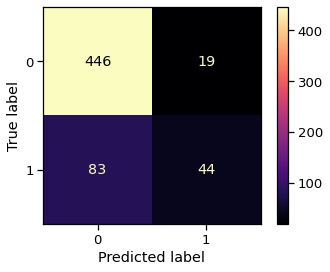

In [47]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot(cmap='magma')
plt.show()

Alright, now I will explain how to interpret the image above. The image above is called the confusion matrix. The confusion matrix is ​​divided into 4 parts, namely **true positive, false positive, false negative, and true negative**. The Y axis of the confusion matrix is ​​the original label, while the X axis of the confusion matrix is ​​the class prediction result. 

True positive is a **positive label, or in this case the label 0 represents NonDefault, which the model predicts as a positive label. Then, the false positive is the NonDefault that the model predicts as the Default. Then, false negative is the Default class which is predicted as NonDefault by the model and the last is true negative where the Default label is predicted by the model as the Default label**.

In [48]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train, zero_division=0))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test, zero_division=0))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1860
           1       0.73      0.37      0.49       507

    accuracy                           0.84      2367
   macro avg       0.79      0.67      0.70      2367
weighted avg       0.82      0.84      0.81      2367



============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       465
           1       0.70      0.35      0.46       127

    accuracy                           0.83       592
   macro avg       0.77      0.65      0.68       592
weighted avg       0.81      0.83      0.80       592



Then is the confusion matrix sufficient in evaluating a model? Of course there are several other ways, such as accuracy, precision, recall, F1-Score, ROC-AUC. I will display the precision, recall, and F1-Score values ​​because I will be focusing on those evaluation metrics.

To give a little context, I'll explain a bit about accuracy, precision, recall, and F1-Score.
- Accuracy is the number of correctly predicted data points out of all the data points.
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
- Recall is the ratio of correctly predicted positive observations to the all observations in actual class
- F1 Score is the weighted average of Precision and Recall.

Then which metric will be emphasized or used as the main metric as an evaluator of the model? First, **I would not use accuracy** because the target class (`DEFAULT`) has an unbalanced number of classes between NonDefault and Default. Using accuracy in such scenarios can result in **misleading interpretation of results**.

Then, which is more important? is it precision or recall? In this case, I assume, both evaluation metrics are very important. Why so? Because in the context of the data being discussed, **prediction errors in determining NonDefault (False Positive) and prediction errors in determining Default (False Negative) can harm the bank in the long and short term**. Therefore, the evaluation metric that **I will use is F1-Score** because this metric considers precision and recall.

The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, 70 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 35% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the logistic regression model that has been made has a score of 0.46 of 1.00. So, clearly that this model is no good for predicting this dataset.

Based on the F-1 Score, it can indicate that my logistic regression model does not have good accuracy. This can be caused by several things, such as the lack of data, insufficient data range and also the data pattern of the features used.

Note:
- Support : These values simply tell us how many poeple belonged to each class in the test dataset. We can see that among the people in the test dataset, 244 people's income is <=50K a year and 156 people earn more than 50K dollars a year.

Now, to make it more legit, I will be using a cross validation. Cross-validation (CV) is a statistical method that can be used to evaluate the performance of a model or algorithm where the data is separated into two subsets, namely learning process data and validation / evaluation data.

**CROSS VALIDATION LOGISTIC REGRESSION REPORT**

In [49]:
kfold = StratifiedKFold(n_splits=10)
lr_train_cross_val = cross_val_score(log_model, X_train_final, y_train, cv=kfold, scoring='f1')

print('Accuracy - All - Cross Validation  : ', lr_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', lr_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', lr_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (lr_train_cross_val.mean()-lr_train_cross_val.std()) , '-', (lr_train_cross_val.mean()+lr_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.32876712 0.5        0.4        0.61538462 0.50666667 0.47368421
 0.5        0.46153846 0.44736842 0.45945946]
Accuracy - Mean - Cross Validation :  0.4692868957915822
Accuracy - Std - Cross Validation  :  0.07059124132934075
Accuracy - Range of Train Set       :  0.3986956544622415 - 0.5398781371209229


The cross validation method that I used is StratifiedKFold so that when the computer separates the data into subsets, those subsets will all have the features that I have used. Simply, just to make that the splitting is even. The number of cross validation that I did is 10 folds or 10 times or 10 subsets of data. And because I used F1-Scoring, the method of cross-validation is also F1-Scoring.

From 10 folds of cross validation, the average F1-Score of my logistic regression model is 0.4692 and it is not significantly different from the classification report. From the cross validation, standard deviation of F1-Score logistic regression is 0.07.

### 7.2 SUPPORT VECTOR MACHINE (SVM)

#### 7.2.1 MODEL DEFINITION

In [50]:
svm_model = SVC(probability=True)

#### 7.2.2 MODEL TRAINING

In [51]:
svm_model.fit(X_train_final, y_train)

SVC(probability=True)

#### 7.2.3 MODEL EVALUATION

In [52]:
y_pred_train_svm = svm_model.predict(X_train_final)
y_pred_test_svm = svm_model.predict(X_test_final)

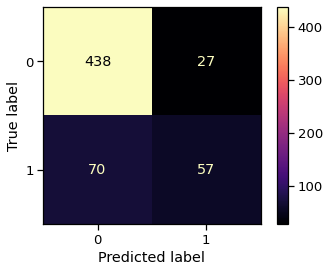

In [53]:
cm = confusion_matrix(y_test, y_pred_test_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the SVM model that has been made, the confusion matrix obtained says that **there are 438 data that are predicted to be NonDEFAULT, there are 51 data NonDEFAULT that are predicted to be DEFAULT. Then there are 70 data of DEFAULT which are predicted as NonDEFAULT and 57 data of DEFAULT which are predicted to be correct as DEFAULT.**

In [54]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train_svm, zero_division=0))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1860
           1       0.72      0.46      0.56       507

    accuracy                           0.84      2367
   macro avg       0.79      0.70      0.73      2367
weighted avg       0.83      0.84      0.83      2367



============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       465
           1       0.68      0.45      0.54       127

    accuracy                           0.84       592
   macro avg       0.77      0.70      0.72       592
weighted avg       0.82      0.84      0.82       592



The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, 72 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 46% of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the support vector machine model that has been made has a score of 0.56 of 1.00. So, clearly that this model is better than logisctic regression model.

Based on the F-1 Score, it can indicate that my support vector machine model still does not have good accuracy.

**CROSS VALIDATION SUPPORT VECTOR MACHINE REPORT**

In [55]:
kfold = StratifiedKFold(n_splits=10)
svm_train_cross_val = cross_val_score(svm_model, X_train_final, y_train, cv=kfold, scoring='f1')

print('Accuracy - All - Cross Validation  : ', svm_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', svm_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', svm_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (svm_train_cross_val.mean()-svm_train_cross_val.std()) , '-', (svm_train_cross_val.mean()+svm_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.43373494 0.58426966 0.55       0.61176471 0.57894737 0.4691358
 0.52380952 0.56470588 0.525      0.54320988]
Accuracy - Mean - Cross Validation :  0.53845777621586
Accuracy - Std - Cross Validation  :  0.0511125248835502
Accuracy - Range of Train Set       :  0.48734525133230977 - 0.5895703010994102


From 10 folds of cross validation, the average F1-Score of my support vector machine model is 0.5384 and it is not significantly different from the classification report. From the cross validation, standard deviation of F1-Score Support Vector Machine is 0.05.

### 7.3 DECISION TREE

#### 7.3.1 MODEL DEFINITION

In [56]:
dt_model = DecisionTreeClassifier(random_state=1)

#### 7.3.2 MODEL TRAINING

In [57]:
dt_model.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=1)

#### 7.3.3 MODEL EVALUATION

In [58]:
y_pred_train_dt = dt_model.predict(X_train_final)
y_pred_test_dt = dt_model.predict(X_test_final)
print('Accuracy Score Train: ',accuracy_score(y_train, y_pred_train_dt))

Accuracy Score Train:  0.9826784959864808


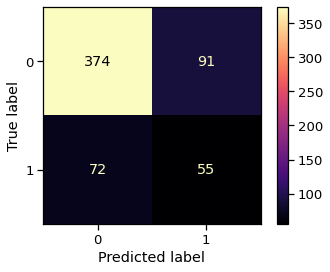

In [59]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the Decision Tree model that has been made, the confusion matrix obtained says that **there are 374 data that are predicted to be NonDEFAULT, there are 91 data NonDEFAULT that are predicted to be DEFAULT. Then there are 72 data of DEFAULT which are predicted as NonDEFAULT and 55 data of DEFAULT which are predicted to be correct as DEFAULT.**

In [60]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train_dt, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train, y_pred_train_dt))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_dt, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1860
           1       1.00      0.92      0.96       507

    accuracy                           0.98      2367
   macro avg       0.99      0.96      0.97      2367
weighted avg       0.98      0.98      0.98      2367

Accuracy Score Train:  0.9826784959864808


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       465
           1       0.38      0.43      0.40       127

    accuracy                           0.72       592
   macro avg       0.61      0.62      0.61       592
weighted avg       0.74      0.72      0.73       592

Accuracy Score Test:  0.8277027027027027


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, only 38 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 43 % of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the Decision Tree model that has been made has a score of 0.40 of 1.00. So, clearly that this model is no good compared to logistic regression and support vector machine.

Based on the F-1 Score, it can indicate that my Decision Tree model does not have good accuracy.

**CROSS VALIDATION DECISION TREE MODEL**

In [61]:
kfold = StratifiedKFold(n_splits=10)
dt_train_cross_val = cross_val_score(dt_model, X_train_final, y_train, cv=kfold, scoring='f1')

print('Accuracy - All - Cross Validation  : ', dt_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', dt_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', dt_train_cross_val.std())
print('Accuracy - Range of Train Set       : ', (dt_train_cross_val.mean()-dt_train_cross_val.std()) , '-', (dt_train_cross_val.mean()+dt_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.30188679 0.41509434 0.4893617  0.39215686 0.4950495  0.43809524
 0.3960396  0.46315789 0.47368421 0.42553191]
Accuracy - Mean - Cross Validation :  0.42900580641111336
Accuracy - Std - Cross Validation  :  0.054826273498814915
Accuracy - Range of Train Set       :  0.37417953291229844 - 0.48383207990992827


From 10 folds of cross validation, the average F1-Score of my Decision Tree model is 0.4290 and it is not significantly different from the classification report. From the cross validation, standard deviation of F1-Score Decision Tree is 0.05.

### 7.4 RANDOM FOREST

#### 7.4.1 MODEL DEFINITION

In [62]:
rf_model = RandomForestClassifier(random_state=1)

#### 7.4.2 MODEL TRAINING

In [63]:
rf_model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=1)

#### 7.4.3 MODEL EVALUATION

In [64]:
y_pred_train_rf = rf_model.predict(X_train_final)
y_pred_test_rf = rf_model.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_rf))

Accuracy Score Train: 0.9826784959864808


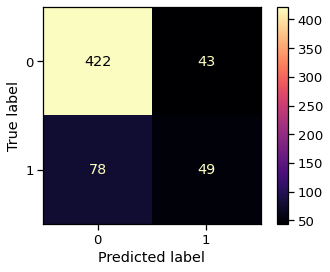

In [65]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the Random Forest model that has been made, the confusion matrix obtained says that **there are 422 data that are predicted to be NonDEFAULT, there are 43 data NonDEFAULT that are predicted to be DEFAULT. Then there are 78 data of DEFAULT which are predicted as NonDEFAULT and 49 data of DEFAULT which are predicted to be correct as DEFAULT.**

In [66]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train, y_pred_train_rf))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1860
           1       0.99      0.93      0.96       507

    accuracy                           0.98      2367
   macro avg       0.99      0.96      0.97      2367
weighted avg       0.98      0.98      0.98      2367

Accuracy Score Train:  0.9826784959864808


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       465
           1       0.53      0.39      0.45       127

    accuracy                           0.80       592
   macro avg       0.69      0.65      0.66       592
weighted avg       0.78      0.80      0.78       592

Accuracy Score Test:  0.8277027027027027


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, only 53 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 39 % of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the Random Forest model that has been made has a score of 0.45 of 1.00. So, clearly that this model is no good compared to logistic regression and support vector machine, but still better than decision tree

Based on the F-1 Score, it can indicate that my Random Forest model does not have good accuracy.

**CROSS VALIDATION RANDOM FOREST REPORT**

In [67]:
kfold = StratifiedKFold(n_splits=10)
rf_train_cross_val = cross_val_score(rf_model, X_train_final, y_train, cv=kfold, scoring='f1')

print('Accuracy - All - Cross Validation  : ', rf_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', rf_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', rf_train_cross_val.std())
print('Accuracy - Range of Train Set      : ', (rf_train_cross_val.mean()-rf_train_cross_val.std()) , '-', (rf_train_cross_val.mean()+rf_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.37209302 0.41304348 0.5        0.53488372 0.53012048 0.46153846
 0.44705882 0.45783133 0.53191489 0.55421687]
Accuracy - Mean - Cross Validation :  0.48027010758306066
Accuracy - Std - Cross Validation  :  0.05671979075072907
Accuracy - Range of Train Set      :  0.4235503168323316 - 0.5369898983337897


From 10 folds of cross validation, the average F1-Score of my Random Forest model is 0.4802 and it is not significantly different from the classification report. From the cross validation, standard deviation of F1-Score Random Forest is 0.05.

### 7.5 k-NN

#### 7.5.1 MODEL DEFINITION

In [68]:
knn = KNeighborsClassifier()

#### 7.5.2 MODEL TRAINING

In [69]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

#### 7.5.3 MODEL EVALUATION

In [70]:
y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_knn))

Accuracy Score Train: 0.8546683565694972


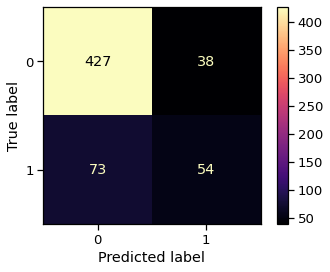

In [71]:
cm = confusion_matrix(y_test, y_pred_test_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the k-NN model that has been made, the confusion matrix obtained says that **there are 427 data that are predicted to be NonDEFAULT, there are 38 data NonDEFAULT that are predicted to be DEFAULT. Then there are 73 data of DEFAULT which are predicted as NonDEFAULT and 54 data of DEFAULT which are predicted to be correct as DEFAULT.**

In [72]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train_knn, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train, y_pred_train_knn))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_knn, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1860
           1       0.74      0.50      0.59       507

    accuracy                           0.85      2367
   macro avg       0.81      0.72      0.75      2367
weighted avg       0.85      0.85      0.84      2367

Accuracy Score Train:  0.8546683565694972


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       465
           1       0.59      0.43      0.49       127

    accuracy                           0.81       592
   macro avg       0.72      0.67      0.69       592
weighted avg       0.80      0.81      0.80       592

Accuracy Score Test:  0.8277027027027027


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, 59 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 43 % of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the k-NN model that has been made has a score of 0.49 of 1.00. So, clearly that this model is no good compared to support vector machine, but still better than logistic regression, decision tree, random forest.

Based on the F-1 Score, it can indicate that my k-NN model still does not have good accuracy.

In [73]:
kfold = StratifiedKFold(n_splits=10)
knn_train_cross_val = cross_val_score(knn, X_train_final, y_train, cv=kfold, scoring='f1')

print('Accuracy - All - Cross Validation  : ', knn_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', knn_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', knn_train_cross_val.std())
print('Accuracy - Range of Train Set      : ', (knn_train_cross_val.mean()-knn_train_cross_val.std()) , '-', (knn_train_cross_val.mean()+knn_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.39534884 0.47311828 0.49382716 0.58064516 0.53846154 0.37647059
 0.55813953 0.51219512 0.48192771 0.55      ]
Accuracy - Mean - Cross Validation :  0.4960133932938491
Accuracy - Std - Cross Validation  :  0.06414955033869474
Accuracy - Range of Train Set      :  0.43186384295515434 - 0.5601629436325438


From 10 folds of cross validation, the average F1-Score of my k-NN model is 0.4960 and it is not significantly different from the classification report. From the cross validation, standard deviation of F1-Score k-NN is 0.06.

### 7.6 NAIVE BAYES

#### 7.6.1 MODEL DEFINITION

In [74]:
gnb = GaussianNB()

#### 7.6.2 MODEL TRAINING

In [75]:
gnb.fit(X_train_final, y_train)

GaussianNB()

#### 7.6.3 MODEL EVALUATION

In [76]:
y_pred_train_gnb = gnb.predict(X_train_final)
y_pred_test_gnb = gnb.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_gnb))

Accuracy Score Train: 0.8094634558512885


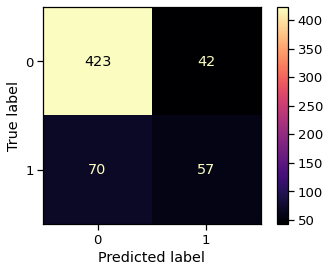

In [77]:
cm = confusion_matrix(y_test, y_pred_test_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the Gaussian Naive Bayes model that has been made, the confusion matrix obtained says that **there are 423 data that are predicted to be NonDEFAULT, there are 42 data NonDEFAULT that are predicted to be DEFAULT. Then there are 70 data of DEFAULT which are predicted as NonDEFAULT and 57 data of DEFAULT which are predicted to be correct as DEFAULT.**

In [78]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train_gnb, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train, y_pred_train_gnb))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_gnb, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1860
           1       0.57      0.45      0.50       507

    accuracy                           0.81      2367
   macro avg       0.71      0.68      0.69      2367
weighted avg       0.80      0.81      0.80      2367

Accuracy Score Train:  0.8094634558512885


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       465
           1       0.58      0.45      0.50       127

    accuracy                           0.81       592
   macro avg       0.72      0.68      0.69       592
weighted avg       0.80      0.81      0.80       592

Accuracy Score Test:  0.8277027027027027


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, 58 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 45 % of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the Gaussian Naive Bayes model that has been made has a score of 0.50 of 1.00. So, clearly that this model is no good compared to support vector machine, but still better than logistic regression, decision tree, random forest, and k-NN.

Based on the F-1 Score, it can indicate that my Gaussian Naive Bayes model still does not have good accuracy.

In [79]:
kfold = StratifiedKFold(n_splits=10)
gnb_train_cross_val = cross_val_score(gnb, X_train_final, y_train, cv=kfold, scoring='f1')

print('Accuracy - All - Cross Validation  : ', gnb_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', gnb_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', gnb_train_cross_val.std())
print('Accuracy - Range of Train Set      : ', (gnb_train_cross_val.mean()-gnb_train_cross_val.std()) , '-', (gnb_train_cross_val.mean()+gnb_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.32183908 0.55670103 0.50574713 0.53763441 0.5        0.4494382
 0.51162791 0.50526316 0.54347826 0.55913978]
Accuracy - Mean - Cross Validation :  0.4990868959361011
Accuracy - Std - Cross Validation  :  0.06671179694619854
Accuracy - Range of Train Set      :  0.43237509898990256 - 0.5657986928822997


From 10 folds of cross validation, the average F1-Score of my Gaussian Naive Bayes model is 0.4990 and it is not significantly different from the classification report. From the cross validation, standard deviation of F1-Score Gaussian Naive Bayes is 0.06.

### 7.7 VOTING CLASSIFIER

#### 7.7.1 MODEL DEFINITION

In [80]:
vc = VotingClassifier(
    estimators=[('lr', log_model), ('svm', svm_model), ('dt', dt_model), ('rf', rf_model), ('knn', knn), ('gnb', gnb)]
)

#### 7.7.2 MODEL TRAINING

In [81]:
vc.fit(X_train_final, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('knn', KNeighborsClassifier()),
                             ('gnb', GaussianNB())])

#### 7.7.3 MODEL EVALUATION

In [82]:
y_pred_train_vc = vc.predict(X_train_final)
y_pred_test_vc = vc.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_vc))

Accuracy Score Train: 0.8724123362906633


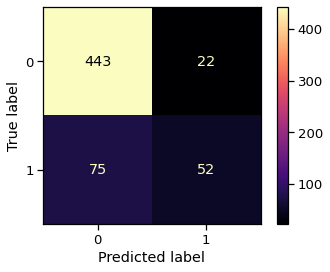

In [83]:
cm = confusion_matrix(y_test, y_pred_test_vc, labels=vc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vc.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the Voting Classifier model that has been made, the confusion matrix obtained says that **there are 443 data that are predicted to be NonDEFAULT, there are 22 data NonDEFAULT that are predicted to be DEFAULT. Then there are 75 data of DEFAULT which are predicted as NonDEFAULT and 52 data of DEFAULT which are predicted to be correct as DEFAULT.**

In [84]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train_vc, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train, y_pred_train_vc))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_vc, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1860
           1       0.86      0.48      0.62       507

    accuracy                           0.87      2367
   macro avg       0.87      0.73      0.77      2367
weighted avg       0.87      0.87      0.86      2367

Accuracy Score Train:  0.8724123362906633


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       465
           1       0.70      0.41      0.52       127

    accuracy                           0.84       592
   macro avg       0.78      0.68      0.71       592
weighted avg       0.82      0.84      0.82       592

Accuracy Score Test:  0.8277027027027027


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, 70 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 41 % of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the Voting Classifier model that has been made has a score of 0.52 of 1.00. So, clearly that this model is no good compared to support vector machine, but still better than logistic regression, decision tree, random forest, k-NN, Gaussian Naive Bayes.

Based on the F-1 Score, it can indicate that my Voting Classifier model still does not have good accuracy.

In [85]:
kfold = StratifiedKFold(n_splits=10)
vc_train_cross_val = cross_val_score(vc, X_train_final, y_train, cv=kfold, scoring='f1')

print('Accuracy - All - Cross Validation  : ', vc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', vc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', vc_train_cross_val.std())
print('Accuracy - Range of Train Set      : ', (vc_train_cross_val.mean()-vc_train_cross_val.std()) , '-', (vc_train_cross_val.mean()+vc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.38461538 0.54117647 0.43835616 0.57831325 0.55263158 0.4691358
 0.5        0.5        0.5        0.575     ]
Accuracy - Mean - Cross Validation :  0.5039228654015735
Accuracy - Std - Cross Validation  :  0.05842587810767042
Accuracy - Range of Train Set      :  0.4454969872939031 - 0.5623487435092439


From 10 folds of cross validation, the average F1-Score of my Voting Classifier model is 0.5039 and it is not significantly different from the classification report. From the cross validation, standard deviation of F1-Score Voting Classifier is 0.05.

## 7.8 GRID SEARCH

Now we have come upon the the section of grid search. Grid search refers to a technique used to identify the optimal hyperparameters for a model. Unlike parameters, finding hyperparameters in training data is unattainable. As such, to find the right hyperparameters, we create a model for each combination of hyperparameters.

Grid search is thus considered a very traditional hyperparameter optimization method since we are basically “brute-forcing” all possible combinations. The models are then evaluated through cross-validation. The model boasting the best accuracy is naturally considered to be the best.

Based on the 7 models that I have created before, here is the ranking of the model based on the F1-Score:

1. SVM
2. Voting Classifier
3. Gaussian Naive Bayes
4. k-NN
5. Logistic Regression
6. Random Forest
7. Decision Tree

For the GridSearch, I will be using SVM as the model to be tuned.

### 7.8.1 GRID PARAMETERS

In [103]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']
            }

skfold = StratifiedKFold(n_splits=5)

param_grid

{'C': [0.1, 1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf', 'sigmoid']}

### 7.8.2 MODEL DEFINITION

In [104]:
svm_gridcv = GridSearchCV(estimator=SVC(probability=True),
                        param_grid=param_grid,
                        cv=skfold,
                        scoring='f1',
                        verbose=3)
svm_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.057 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.076 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.020 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.039 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.5s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.5s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.294 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1', verbose=3)

In [105]:

# print best parameter after tuning
print(svm_gridcv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svm_gridcv.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1, probability=True)


Berdasarkan dari hasil GridSearchCV untuk model SVM, telat didapatkan bahwa parameter yang terbaik untuk SVM adalah:

- 'C' : 1
- 'gamma': 0.1
- 'kernel': 'rbf'

### 7.8.3 MODEL EVALUATION

In [106]:
y_pred_train_gridsvm = svm_gridcv.predict(X_train_final)
y_pred_test_gridsvm = svm_gridcv.predict(X_test_final)
print('Accuracy Score Train:', accuracy_score(y_train, y_pred_train_gridsvm))

Accuracy Score Train: 0.8449514152936206


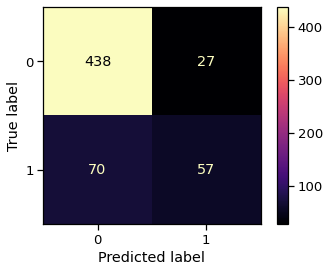

In [107]:
cm = confusion_matrix(y_test, y_pred_test_gridsvm, labels=svm_gridcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_gridcv.classes_)

disp.plot(cmap='magma')
plt.show()

Based on the best parameters of GridSearchCV that applied to SVM model that has been made, the confusion matrix obtained says that **there are 438 data that are predicted to be NonDEFAULT, there are 27 data NonDEFAULT that are predicted to be DEFAULT. Then there are 70 data of DEFAULT which are predicted as NonDEFAULT and 57 data of DEFAULT which are predicted to be correct as DEFAULT**.

In [108]:


print("="*27,"TRAINING","="*27)
print(classification_report(y_train, y_pred_train_gridsvm, zero_division=0))
print('Accuracy Score Train: ',accuracy_score(y_train, y_pred_train_gridsvm))

print("\n")
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_test_gridsvm, zero_division=0))
print('Accuracy Score Test: ',accuracy_score(y_test, y_pred_test))


=========================== TRAINING ===========================
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1860
           1       0.72      0.46      0.56       507

    accuracy                           0.84      2367
   macro avg       0.79      0.70      0.73      2367
weighted avg       0.83      0.84      0.83      2367

Accuracy Score Train:  0.8449514152936206


============================== TEST ==============================
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       465
           1       0.68      0.45      0.54       127

    accuracy                           0.84       592
   macro avg       0.77      0.70      0.72       592
weighted avg       0.82      0.84      0.82       592

Accuracy Score Test:  0.8277027027027027


The interpretations that can be obtained from the classification report test data above are:

- Precision: of all the people predicted to be Default by the model, 68 % were correct.
- Recall : of all people that is Default, the model only predicted this outcome correctly for 45 % of those people.
- F-1 Score: tells how accurate the model has been because the closer the F-1 value is, the more accurate the model will be. In this case, the Voting Classifier model that has been made has a score of 0.54 of 1.00. So, clearly that this new SVM Model with tuned hyperparameter is no good compared to the first support vector machine model, but still better than logistic regression, decision tree, random forest, k-NN, Gaussian Naive Bayes.

Based on the F-1 Score, it can indicate that my tuned hyperparameter SVM model still does not have good accuracy.

**At this point here is a recap analysis of this section :**

1. The best model that has been made is baseline SVM Model.
2. The evaluation metric that I used to evaluate all the models is F1-Score. Because in my perspective, both precision and recall in the data context matter. The reason I don't use accuracy as my evaluation metric is because the target class is inbalance.
3. F1-Score of tuned hyperparameter SVM Model is 0.54, while baseline SVM Model is 0.56. The reason why the kernel in hyperparameter that I used is only 'rbf' and 'sigmoid' is because my device limitation. I have also tried using 'poly' as the kernel parameter. And due to time limitation of this project, I stopped the hyperparameter tuning because the process had already taken 4 hours.

# VIII. MODEL INFERENCE

In this section, I will try to predict the inference model using the model that I have made.

In [109]:
data_inf_final = data_inf.filter(['limit_balance','sex','age','education_level','marital_status',
                'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6'], axis=1)

In [110]:
inf_num = data_inf_final[num_columns]
inf_cat = data_inf_final[cat_columns]

In [111]:
inf_num_scaled = scaler.transform(inf_num)
inf_num_scaled

array([[0.13924051, 0.45833333],
       [0.32911392, 0.125     ],
       [0.06329114, 0.39583333],
       [0.37974684, 0.5       ],
       [0.41772152, 0.22916667]])

In [112]:
inf_final = np.concatenate([inf_num_scaled, inf_cat], axis=1)

In [116]:
y_pred_inf = svm_model.predict(inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['PRED_DEFAULT'])

In [117]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,DEFAULT,PRED_DEFAULT
0,120000,2,2,2,43,2,2,0,0,0,...,41563,36779,0,3507,2000,2500,2000,1500,1,1
1,270000,2,2,1,27,0,0,0,2,0,...,18669,25175,4000,5000,0,10000,7000,2000,0,0
2,60000,2,2,1,40,0,0,0,0,0,...,6388,5816,5000,1508,4790,6388,6046,17806,0,0
3,310000,2,1,1,45,0,0,0,0,0,...,101082,103202,3340,4370,4000,5000,3899,3761,0,0
4,340000,2,2,2,32,0,0,0,0,0,...,87070,88828,3871,3136,3014,3123,3168,4855,0,0


# IX. CONCLUSION

The conclusion of the analysis that has been carried out is as follows:

1. Based on the analysis that has been made, I have succeeded in creating a machine learning model to predict the probability that a credit card holder will default or not.
2. In my opinion, the factors that can determine whether a credit card holder will default or not are the credit card limit balance, marrital status, age, sex, education level, and most importantly their repayment status in just 1 month.
3. Based on the analysis, it can be concluded that SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data
4. The predictor model used to predict this possibility is the SVM Model with an F1-Score value of 0.56.
5. I have also created an SVM model with hyperparameter tuning, but the model has an F1-Score value 2% below the baseline SVM Model. This can be caused by several things, namely the unbalanced target class. The NonDefault class has a proportion of 77% of the total data, while the Default class is only 23% of the total data. Then, the hardware limitations that I have can also be an obstacle in doing hyperparameter tuning. Previously I've tried to use the kernel 'poly' as a parameter but due to the limitations of the device used, I stopped the process after spending 4 hours.

The suggestions I can give for projects or analysis on the topic are:

1. Resampling the data because the target class is not balanced. The methods that can be used are oversampling, undersampling, and also SMOTE.
2. Make predictions using unscaled data as well to see more detailed differences.
3. The device used at least uses an SSD to speed up model computing.

# X. CONCEPTUAL PROBLEMS

**1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!**<br>
<br>
Entropy is a measure of disorder or impurity in the given dataset. In the decision tree, messy data are split based on values of the feature vector associated with each data point. With each split, the data becomes more homogenous which will decrease the entropy. However, some data in some nodes will not be homogenous, where the entropy value will not be small. The higher the entropy, the harder it is to draw any conclusion. When the tree finally reaches the terminal or leaf node maximum purity is added.<br>
<br>
The Information Gain measures the expected reduction in entropy. Entropy measures impurity in the data and information gain measures reduction in impurity in the data. The feature which has minimum impurity will be considered as the root node. Information gain is used to decide which feature to split on at each step in building the tree. The creation of sub-nodes increases the homogeneity, that is decreases the entropy of these nodes. The more the child node is homogeneous, the more the variance will be decreased after each split. Thus Information Gain is the variance reduction and can calculate by how much the variance decreases after each split.<br>
<br>
Information gain of a parent node can be calculated as the entropy of the parent node subtracted entropy of the weighted average of the child node.<br>
<br>
In short the purpose of criterion parameter in decision tree is specify which method we will choose when performing split operations.<br>
<br>
Gini Impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. When training a decision tree, the best split is chosen by maximizing the Gini Gain, which is calculated by subtracting the weighted impurities of the branches from the original impurity.<br>
<br>
**2. Apakah fungsi dari pruning pada Tree model?**<br>
<br>
Pruning is the process of eliminating weight connections from a network to speed up inference and reduce model storage size. Decision trees and neural networks, in general, are overparameterized. Pruning a network entails deleting unneeded parameters from an overly parameterized network.<br>
<br>
Pruning mostly serves as an architectural search inside the tree or network. In fact, because pruning functions as a regularizer, a model will often generalise slightly better at low levels of sparsity. The trimmed model will match the baseline at higher levels. If you push it too far, the model will start to generalise worse than the baseline, but with greater performance.<br>
<br>
The goal of pruning is to remove sections of a classification model that explain random variation in the training sample rather than actual domain characteristics. This makes the model more understandable to the user and, perhaps, more accurate on fresh data that was not used to train the classifier. An effective approach for differentiating sections of a classifier that are attributable to random effects from parts that describe significant structure is required for pruning. There are different methods for pruning listed in this article used in both strategies.<br>
<br>
**3. Bagaimana cara memilih K yang optimal pada KNN?**<br>
<br>
The best way to get the optimal K is through cross validation. But there's one extra step needed, which is to fit the model and choose k using different sets of data (fitting in the case of knn being just remembering all the data points). If you fit the model and select the hyperparameters on the same set, the error will underestimate the true generalization error, which is the error you'd see on new data drawn from the same distribution. This means the classifier may do worse on new data than you'd expect. Cross validation is a way to choose k that tries to minimize the generalization error.<br>
<br>
Here's how to select k using d-fold cross validation. It's usually called k-fold, but we're using k to talk about the number of neighbors.

1. Split the data into d disjoint, similarly-sized subsets<br>
2. Hold out the first set. This is called the validation set.<br>
3. Train your classifier on the remaining data. In the case of knn classification, just remember all the data.<br>
4. For each value of k:<br>
    - Classify each point in the validation set, using its k nearest neighbors in the training set<br>
    - Record the error<br>
5. Repeat steps 1-4 for all d choices of the validation set.<br>
6. For each choice of k, find the average error across validation sets. Choose the value of k with the lowest error.<br>
7. Construct a final classifier using all of the original data and the chosen value of k. This is what you'd use to classify new points.<br>

In the case where d is equal to the number of data points (i.e. each validation set contains a single point), this is called leave-one-out cross validation.<br>
<br>
If you want to estimate the generalization error of the final classifier, some extra work is needed. You can't just take the error on the validation sets, because k was chosen to minimize this, so it's an underestimate of the true generalization error. Another way of thinking about this is that procedure for choosing k has to be considered part of the learning algorithm. The simplest thing to do is test the final classifier on a separate set of data you held out at the beginning (called the test set). This is a reasonable option if you have lots of data and a slow algorithm. Another option that takes longer but uses the data more efficiently is to use cross validation again. Here, there will be an 'outer' cross validation loop, where the held-out data is called the test set. At each step, you further split the data into training and validation sets and run a nested, 'inner' cross validation loop to choose k, as above. The final generalization error is estimated by classifying the test sets and averaging their errors.<br>

**4. Jelaskan apa yang kalian ketahui tentang Cross Validation!**<br>
<br>
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.<br>

**5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!**<br>
<br>
- Accuracy is the number of correctly predicted data points out of all the data points.
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
- Recall is the ratio of correctly predicted positive observations to the all observations in actual class
- F1 Score is the weighted average of Precision and Recall.
